# Data Analysis Assignment 2
**Due Date:** December 8, 2024, 23:59  
**Total Points:** 114 + 15 bonus points

## Copyright and Fair Use

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

## Guidelines

1. **DO NOT add or delete any cells (or modify cell IDs)**
2. Complete code cells marked with `# YOUR CODE HERE`
3. Comment or remove lines with `raise NotImplementedError()`
4. Run all cells before submission to verify your solutions
5. Submit Notebook (.ipynb file) on Moodle with filename using the correct format, e.g., **Assignment_2_JohnDoe_12345678.ipynb**

<div style="background-color: #e6f3ff; padding: 15px; margin: 10px; border-left: 5px solid #2196F3; border-radius: 3px;">
In this assignment, we will apply the preprocessing and analysis techniques demonstrated in the last exercise to a different real-world dataset. While the previous exercise focused on sensor measurements (temperature, humidity, etc.), this time we'll analyze system performance metrics. The preprocessing steps will be similar - handling invalid data, removing outliers, dealing with missing values - but adapted to the characteristics of system performance data. Just as we previously identified patterns in sensor behavior, here we'll look for patterns in system behavior that could indicate test system anomalies. Understanding the daily/nightly testing cycles will be crucial for identifying abnormal states, much like how we analyzed daily patterns in the sensor data.
</div>

# System Performance Analysis

## Background
This assignment analyzes performance data from test systems that perform nightly testing of industrial network devices (switches and routers) at Westermo. These test systems validate devices used in critical applications like energy distribution and railway systems.

When tests fail, the cause could be:
1. Actual issues with the software under test
2. Problems in the test framework code
3. Hardware setup issues (e.g., wrong cable connections, unpowered devices)
4. Server issues (e.g., full disk)

The key question is: "If the test system is in an abnormal state – can we trust the test results?"

### The Dataset
The complete dataset consists of 19 CSV files (one per test system), each containing:
- About 86,000 samples
- Collected over one month
- Sampled twice per minute
- Over 20 performance metrics

Data accessibility and further information: https://github.com/westermo/test-system-performance-dataset

**Note:** If you would like to learn more about the dataset, read through the attached pdf file, and check out the dataset link above

### Focus of Our Analysis
For this assignment, we'll analyze one test system focusing on these key metrics:

1. **System Load (load-15m)**
   - 15-minute average of system workload
   - Shows test execution patterns
   - Peaks during night testing, low during day

2. **Memory Usage (memory_used_pct)**
   - Percentage of total memory used
   - Calculated from available/total memory
   - Indicates resource utilization

3. **CPU Usage (cpu-user)**
   - Rate of change in seconds spent on user processes
   - Shows changes in processing activity
   - Higher values indicate increasing CPU time use

4. **Temperature Change (sys-thermal)**
   - Rate of change in system temperature
   - Optional metric (not on all systems)
   - Helps detect system stress

5. **Server Status (server-up)**
   - System heartbeat indicator
   - Values > 0 show server availability
   - Critical for validating system operation


In [1]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
plt.rcParams.update({
    'figure.figsize': [12, 8],
    'figure.dpi': 150,
    'figure.autolayout': True,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'font.size': 12
})

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

np.random.seed(42)


## Task 1.1: Data Loading and Preparation (10 points)

Create a function that loads and prepares the system performance data. Your function should:

1. Load the data file
2. Convert Unix timestamps to datetime
3. Calculate memory usage percentage
4. Drop unneeded columns 

Columns in original dataset:
```
'timestamp', 'load-1m', 'load-5m', 'load-15m', 'sys-mem-swap-total', 'sys-mem-swap-free', 'sys-mem-free', 'sys-mem-cache', 'sys-mem-buffered', 'sys-mem-available', 'sys-mem-total', 'sys-fork-rate', 'sys-interrupt-rate', 'sys-context-switch-rate', 'sys-thermal', 'disk-io-time', 'disk-bytes-read', 'disk-bytes-written', 'disk-io-read', 'disk-io-write', 'cpu-iowait', 'cpu-system', 'cpu-user', 'server-up'
```

Hint:
```python
def load_system_data(file_path):
    # Read CSV
    df = pd.read_csv(file_path)
    
    # Convert timestamp
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

    #set index to datetime
    df.set_index('datetime', inplace=True)
    
    # Calculate memory usage
    df['memory_used_pct'] = (1 - df['sys-mem-available']/df['sys-mem-total']) * 100
    
    return df
```

After loading data and adding ```'memory_used_pct'```, column names in our dataframe should look like this:
```
['datetime', 'load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']
```

In [2]:
def load_system_data(file_path: str) -> pd.DataFrame:
    """Load and prepare test system performance data.
    
    Parameters
    ----------
    file_path : str
        Path to the CSV data file
        
    Returns
    -------
    pd.DataFrame
        Processed dataframe with columns:
        - datetime: Timestamp (index)
        - load-15m: 15-minute load average
        - memory_used_pct: Calculated memory usage
        - cpu-user: Rate of change in CPU time
        - sys-thermal: Temperature change
        - server-up: System availability
    """
    # Read CSV
    df = pd.read_csv(file_path)
    
    # Convert timestamp
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

    #set index to datetime
    df.set_index('datetime', inplace=True)
    
    # Calculate memory usage
    df['memory_used_pct'] = (1 - df['sys-mem-available']/df['sys-mem-total']) * 100

    # droping unneeded columns
    #columns_list = [1,2]
    #columns_list += list(range(4,21))
    #df = df.drop(columns=df.columns[columns_list])
    #df = df.drop(columns=['load-1m',	'load-5m'])
    
    required_cols = ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']
    #df = df.loc[:,required_cols]
    df = df[required_cols]
    
    #print(columns_list)
    # file_out = 'reduced_data.csv'
    # df.to_csv(file_out, index=True)

    return df
    
    #raise NotImplementedError()
this = load_system_data('system-1.csv')
this.describe()

print("there are: ", (this['server-up']< 2).sum() , " out of ", this['server-up'].count()," datapoints in inactive state")


there are:  6  out of  85749  datapoints in inactive state


In [3]:
# Test cell (simply run it)
df = load_system_data('system-3.csv')

# Check required columns
required_cols = ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']
assert all(col in df.columns for col in required_cols), "Missing required columns"
assert isinstance(df.index, pd.DatetimeIndex), "Index should be datetime"
assert df['memory_used_pct'].between(0, 100).all(), "Memory usage should be percentage"
print("Basic data structure tests passed!")

print("Data Overview:")
print(f"Time range: {df.index.min()} to {df.index.max()}")
print(f"Number of samples: {len(df):,}")
print("\nFirst few rows:")
print(df.head())

Basic data structure tests passed!
Data Overview:
Time range: 1970-01-01 00:00:00 to 1970-01-31 00:00:00
Number of samples: 86,401

First few rows:
                     load-15m  memory_used_pct  cpu-user  sys-thermal  \
datetime                                                                
1970-01-01 00:00:00      0.01        16.103799    0.0185         1.65   
1970-01-01 00:00:30      0.01        15.911521    0.0100         1.60   
1970-01-01 00:01:00      0.01        16.076830    0.0820         1.60   
1970-01-01 00:01:30      0.01        15.917300    0.0210         0.00   
1970-01-01 00:02:00      0.01        16.000639    0.0200         1.60   

                     server-up  
datetime                        
1970-01-01 00:00:00          2  
1970-01-01 00:00:30          2  
1970-01-01 00:01:00          2  
1970-01-01 00:01:30          2  
1970-01-01 00:02:00          2  


## Task 1.2: Raw Data Overview Visualization (30 points)

Create a comprehensive visualization of the system metrics following the style in Unit2. You are free to adapt and add more plots, however, your visualization should atleast include:

1. **Time Series Overview** (5 points)
   - Show all metrics over time
   - Highlight server availability status
   - Use appropriate alpha and line width
   - Add proper labels

2. **Daily Distribution** (5 points)
   - Create boxplots by hour
   - Show daily patterns
   - Consider server uptime periods
   
3. **Correlation Analysis** (5 points)
   - Create correlation matrix between metrics\
     (Use seaborn heatmap visualization) 

4. **Relationship Visualization** (5 points)
   - Scatter plot of key metrics
   - Hexbin plot for dense areas
   - Color scatter points by server status
     
5. **Layout and Formatting** (5 points)
    - Clear titles and labels
    - Appropriate color schemes
   
Hints for visualizations:
```python
# Correlation heatmap
corr_matrix = df[['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']].corr()
sns.heatmap(corr_matrix,
            annot=True,      # Show correlation values
            cmap='coolwarm', # Diverging colormap
            center=0,        # Center colormap at 0
            fmt='.2f',       # Format coefficients
            ax=axes[1, 0])
axes[1, 0].set_title('Metric Correlations')

# Scatter plot with server status
scatter = axes[1, 1].scatter(df['cpu-user'], df['memory_used_pct'],
                           c=df['server-up'],  # Color by status
                           cmap='RdYlGn',      # Red-Yellow-Green
                           alpha=0.5)          
plt.colorbar(scatter, ax=axes[1, 1], label='Server Status')
axes[1, 1].set_xlabel('CPU Time Rate of Change (seconds)') 
axes[1, 1].set_title('CPU Time vs Memory Usage')        

# Hexbin for density
df.plot.hexbin(x='load-15m', y='cpu-user',
               gridsize=20,
               cmap='YlOrRd',
               ax=axes[2, 0])
axes[2, 0].set_title('Load vs CPU Usage Density')
```

In [4]:
df['hour'] = df.index.hour

measurements = {
    'load-15m': ('load-15m', '%'),
    'memory_used_pct': ('memory_used_pct', '%'),
    'cpu-user': ('cpu-user', 'delta-s'),
    'sys-thermal': ('sys-thermal', 'avg delta-°C/min')
}

# Time-Series - raw and rolling average
fig1, axes = plt.subplots(2, 2, figsize=(20, 15))
fig1.suptitle('Tme-Series - Raw Data', fontsize=16, y=1.02)

down_data = df[df['server-up'] != 2]

#df_time = df.set_index('datetime')    
for i,(measure, (title, unit)) in enumerate(measurements.items()):
    row = i // 2
    col = i % 2
    
    # Plot mean with standard deviation
    df[measure].plot(alpha=0.15,ax=axes[row, col] , label='Raw', color='blue')
    df[measure].rolling(window=12).mean().plot(ax=axes[row, col],label='12-hour moving average', color='green', alpha=0.5)
    if not down_data.empty:
        down_data[measure].plot(ax=axes[row, col] , label='Error', color='red')
    
    axes[row, col].set_title(f'Time-Series of {measure.upper()}')
    axes[row, col].set_xlabel('Datetime')
    #axes[row, col].set_ylabel(measurement)
    axes[row, col].set_ylabel(f'{title} ({unit})')
    axes[row, col].grid(True)
    axes[row, col].legend()
    
plt.tight_layout()
#---------------------

# Daily patterns - Boxplots -missing day/night
fig2, axes = plt.subplots(2, 2, figsize=(20, 15))
fig2.suptitle('Daily patterns - Boxplots and Averages', fontsize=16, y=1.02)

for i, (measure, (title, unit)) in enumerate(measurements.items()):
    row = i // 2
    col = i % 2
    
    hourly_mean = df.groupby('hour')[measure].agg(['mean'])
    hourly_mean['mean'].plot(
        ax=axes[row, col],
        kind='line',
        color='green'
    )

    df.boxplot(
        ax=axes[row, col],
        column=measure,
        by='hour'
    )
    if(title == 'cpu-user'):
         axes[row, col].set_ylim([0, 0.8])
    axes[row, col].set_title(f'Daily Pattern of {title} ')
    axes[row, col].set_xlabel('Hour of Day')
    axes[row, col].set_ylabel(f'{title} ({unit})')
    axes[row, col].grid(True)
plt.tight_layout()
#---------------------

# Correlation heatmap
fig3, axes = plt.subplots(1, 1, figsize=(12, 10))
fig3.suptitle('Correlation', fontsize=16, y=1.02)

corr_matrix = df[['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']].corr()
sns.heatmap(corr_matrix,
            annot=True,      # Show correlation values
            cmap='coolwarm', # Diverging colormap
            center=0,        # Center colormap at 0
            fmt='.2f',       # Format coefficients
            ax=axes)
axes.set_title('Metric Correlations')
#---------------------

fig4, axes = plt.subplots(4, 2, figsize=(20, 30))
fig4.suptitle('Relationship: Scatter & Hexbin plot', fontsize=24, y=1.02)
    
# Scatter plots with server status
scatter = axes[0, 0].scatter(df['cpu-user'], df['memory_used_pct'],
                           c=df['server-up'],  # Color by status
                           cmap='RdYlGn',      # Red-Yellow-Green
                           alpha=0.5)          
plt.colorbar(scatter, ax=axes[0, 0], label='Server Status')
axes[0, 0].set_xlabel('CPU Time Rate of Change (s)') 
axes[0, 0].set_ylabel('Memory Usage (%)') 
axes[0, 0].set_title('CPU Time vs Memory Usage')

scatter = axes[1, 0].scatter(df['load-15m'], df['memory_used_pct'],
                           c=df['server-up'],  # Color by status
                           cmap='RdYlGn',      # Red-Yellow-Green
                           alpha=0.5)          
plt.colorbar(scatter, ax=axes[1, 0], label='Server Status')
axes[1, 0].set_xlabel('System load over the last 15 minutes (%)') 
axes[1, 0].set_ylabel('Memory Usage (%)') 
axes[1, 0].set_title('System Load vs Memory Usage')

scatter = axes[2, 0].scatter(df['load-15m'], df['cpu-user'],
                           c=df['server-up'],  # Color by status
                           cmap='RdYlGn',      # Red-Yellow-Green
                           alpha=0.5)          
plt.colorbar(scatter, ax=axes[2, 0], label='Server Status')
axes[2, 0].set_xlabel('System load over the last 15 minutes (%)') 
axes[2, 0].set_ylabel('CPU Time Rate of Change (s)') 
axes[2, 0].set_title('System Load vs Memory Usage')

scatter = axes[3, 0].scatter(df['load-15m'], df['sys-thermal'],
                           c=df['server-up'],  # Color by status
                           cmap='RdYlGn',      # Red-Yellow-Green
                           alpha=0.5)          
plt.colorbar(scatter, ax=axes[3, 0], label='Server Status')
axes[3, 0].set_xlabel('System load over the last 15 minutes (%)') 
axes[3, 0].set_ylabel('System thermal change (delta-°C/min)') 
axes[3, 0].set_title('System Load vs System Thermals')
#--------------------- 

# Hexbin for density
df.plot.hexbin(x='cpu-user', y='memory_used_pct',
               gridsize=100,
               cmap='YlOrRd',
               ax=axes[0, 1])
axes[0, 1].set_title('CPU Time vs Memory Usage')
axes[0, 1].set_xlim([-0.025, 0.4])
axes[0, 1].set_ylim([4, 9])

df.plot.hexbin(x='load-15m', y='memory_used_pct',
               gridsize=100,
               cmap='YlOrRd',
               ax=axes[1, 1])
axes[1, 1].set_title('System Load vs Memory Usage')
axes[1, 1].set_xlim([-0.05, 0.3])
axes[1, 1].set_ylim([3.5, 9])

df.plot.hexbin(x='load-15m', y='cpu-user',
               gridsize=100,
               cmap='YlOrRd',
               ax=axes[2, 1])
axes[2, 1].set_title('System Load vs CPU Time')
axes[2, 1].set_xlim([-0.015, 0.3])
axes[2, 1].set_ylim([-0.075, 0.4])

df.plot.hexbin(x='load-15m', y='sys-thermal',
               gridsize=100,
               cmap='YlOrRd',
               ax=axes[3, 1])
axes[3, 1].set_title('System Load vs System Thermals')
axes[3, 1].set_xlim([-0.025, 0.3])
axes[3, 1].set_ylim([-0.25, 2])
plt.tight_layout()
#---------------------

measure = ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal']

# Get data without duplicates by taking mean for each timestamp
df_plot = df.groupby(df.index)[measure].mean()

try:
    sns.pairplot(
        data=df_plot,
        diag_kind='kde',
        plot_kws={'alpha': 0.5, 's': 20},
        height=3
    )
    plt.suptitle('Scatter Matrix of Cleaned Measurements', y=1.02, fontsize=16)
    plt.show()
except Exception as e:
    print(f"Warning: Could not create scatter matrix plot: {str(e)}")


KeyboardInterrupt: 

## Task 2.1: Data Preprocessing (20 points)

<div style="background-color: #e6f3ff; padding: 15px; margin: 10px; border-left: 5px solid #2196F3; border-radius: 3px;">
Following our preprocessing approach from Unit 2, we need to clean and prepare the system performance data. Unlike sensor data where we focused on physical measurement validity, here we need to consider system behavior patterns, particularly the day/night testing cycles.
</div>

Create a function that handles:

1. **Invalid Values** (5 points)
   - Remove values outside valid ranges
   - Consider system behavior patterns
   - Verify server status integrity
   -
    ```python
    valid_ranges = {
        'load-15m': (0, 0.5),           # System load
        'memory_used_pct': (0, 100),   # Percentage
        'cpu-user': (0, 2),            # Rate of change in CPU time
        'sys-thermal': (-10, 10),      # Temperature change rate (°C/min)
        'server-up': (0, float('inf')) # Server availability
    }
    ```

2. **Duplicate Timestamps** (5 points)
   - Identify duplicate readings
   - Aggregate using appropriate methods
   - Maintain data consistency
   
3. **Outliers** (5 points)
   - Use IQR method for each metric
   - Consider day/night differences
   - Document removed points
   
4. **Missing Values** (5 points)
   - Handle gaps appropriately
   - Consider server status
   - Limit interpolation range

In [ ]:
def remove_outliers_iqr(data: pd.Series, column: str) -> pd.Series:
    """Remove outliers using IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # debugging
    print(column, " lower-bound: ", Q1 - 1.5*IQR," upper-bound: ", Q3+ 1.5*IQR)
    valid_mask = (data[column] >= Q1 - 1.5*IQR) & \
                 (data[column] <= Q3 + 1.5*IQR)
    return (data[column].where(valid_mask, np.nan), data[column].where(~valid_mask))

def handle_missing_values(data: pd.DataFrame, column: str,
                         max_gap: int = 8) -> pd.Series:
    """Interpolate missing values with limit."""
    return data[column].interpolate(
        method='linear',
        limit=max_gap  # Only fill gaps up to 8 points
    )



def preprocess_system_data(df: pd.DataFrame) -> tuple:
    """Preprocess system performance data.
    
    Parameters
    ----------
    df : pd.DataFrame
        Raw system performance data with required metrics:
        - load-15m
        - memory_used_pct
        - cpu-user
        - sys-thermal (optional)
        - server-up
        
    Returns
    -------
    tuple
        (df_original, df_cleaned) containing:
        - Original data copy
        - Cleaned data with:
          * Invalid values removed
          * Duplicates handled
          * Outliers removed
          * Missing values interpolated
    """
    # Store original data
    df_original = df.copy()
    df_cleaned = df.copy()
    df_outliers = df.copy()
    # Define valid ranges
    valid_ranges = {
        'load-15m': (0, 0.5),          # System load
        'memory_used_pct': (0, 100),   # Percentage
        'cpu-user': (0, 2),            # Rate of change in CPU time
        'sys-thermal': (-10, 10),      # Rate of change in °C
        'server-up': (0, 2)            # Server availability
    }

    # print("----------ORIGINAL__Values outside range--------------")
    # for (col, (min, max)) in valid_ranges.items():
    #     print(col, " : \t", (df_original[col] <  min).sum() + (df_original[col] > max).sum())
    # print()
    # print("--------------ORIGINAL  MIN / MAX VALUES-----------------")
    # for (col, (min, max)) in valid_ranges.items():
    #     print(col, " max / min: \t", df_original[col].max(), df_original[col].min())
    
    
    
    # 1. Handle invalid values
    df_cleaned = df_cleaned.reset_index()
    df_cleaned['datetime'] = pd.to_datetime(df_cleaned['datetime'],
                                  format='%Y-%m-%d %H:%M:%S.%f',
                                  errors='coerce') #coerce to set invalid data as NaN
    df_cleaned = df_cleaned.dropna(subset=['datetime'])

    for column, (min_val, max_val) in valid_ranges.items():
        invalid_mask = (df_cleaned[column] < min_val) | (df_cleaned[column] > max_val)
        df_cleaned.loc[invalid_mask, column] = np.nan


    # 2. Handle duplicates
    df_cleaned = df_cleaned.groupby(['datetime']).agg({
        'load-15m': 'mean',  # Average the load values
        'memory_used_pct': 'mean',  # Average memory usage
        'cpu-user': 'mean',  # Average CPU usage
        'sys-thermal': 'mean',  # Average thermal data
        'server-up': 'max'  # Take the max server-up status (1 or 0)
    }).reset_index()
    
    # Set index and sort
    df_cleaned.set_index('datetime', inplace=True)
    #df_cleaned.sort_index(inplace=True)
    
    # 3. Remove outliers
    for col in ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']:
        (df_cleaned[col],df_outliers[col]) = remove_outliers_iqr(df_cleaned, col)

    # 4. Handle missing values
    for col in ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']:
        df_cleaned[col] = handle_missing_values(df_cleaned, col)

    # file_out = 'filteres_data.csv'
    # df_cleaned.to_csv(file_out, index=True)
    df_cleaned = df_cleaned.dropna()
    

    print("--------------CLEANED  MIN / MAX VALUES-----------------")
    for (col, (min, max)) in valid_ranges.items():
        print(col, " max / min: \t", df_cleaned[col].max(), df_cleaned[col].min())

    #print(df_outliers.head())

    return (df_original, df_cleaned)

### Helper Functions

You may use these helper functions in your implementation:

```python
def remove_outliers_iqr(data: pd.Series, column: str) -> pd.Series:
    """Remove outliers using IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    valid_mask = (data[column] >= Q1 - 1.5*IQR) & \
                 (data[column] <= Q3 + 1.5*IQR)
    return data[column].where(valid_mask, np.nan)

def handle_missing_values(data: pd.DataFrame, column: str,
                         max_gap: int = 8) -> pd.Series:
    """Interpolate missing values with limit."""
    return data[column].interpolate(
        method='linear',
        limit=max_gap  # Only fill gaps up to 8 points
    )
```

In [ ]:
# Test cell for Task 2.1 - Preprocessing
df_original, df_cleaned = preprocess_system_data(df)
assert isinstance(df_original, pd.DataFrame), "Should return original dataframe"
assert isinstance(df_cleaned, pd.DataFrame), "Should return cleaned dataframe"
assert df_cleaned['cpu-user'].min() >= 0 and df_cleaned['cpu-user'].max() <= 2, "CPU rate should be between 0 and 2"
print("Basic preprocessing tests passed!")

print("Data Preprocessing Results:")
print(f"Original shape: {df_original.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

print("\nMissing Values Summary:")
print(df_cleaned.isnull().sum())

print("\nValue Ranges (Cleaned):")
for col in ['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']:
    print(f"\n{col}:")
    print(df_cleaned[col].describe())

load-15m  lower-bound:  -0.12499999999999997  upper-bound:  0.31499999999999995
memory_used_pct  lower-bound:  3.3301647328124955  upper-bound:  9.671987162374435
cpu-user  lower-bound:  -0.009999999997489798  upper-bound:  0.08999999999814459
sys-thermal  lower-bound:  -2.25  upper-bound:  3.75
server-up  lower-bound:  2.0  upper-bound:  2.0
--------------CLEANED  MIN / MAX VALUES-----------------
load-15m  max / min: 	 0.31 0.0
memory_used_pct  max / min: 	 9.671802798496177 4.2310772602642714
cpu-user  max / min: 	 0.089500000001135 0.011000000000007
sys-thermal  max / min: 	 3.75 0.0
server-up  max / min: 	 2.0 2.0
Basic preprocessing tests passed!
Data Preprocessing Results:
Original shape: (85749, 6)
Cleaned shape: (85488, 5)

Missing Values Summary:
load-15m           0
memory_used_pct    0
cpu-user           0
sys-thermal        0
server-up          0
dtype: int64

Value Ranges (Cleaned):

load-15m:
count    85488.000000
mean         0.096951
std          0.072988
min          

## Task 2.2: Raw vs Cleaned Data Comparison by Visualization (30 points)

<div style="background-color: #e6f3ff; padding: 15px; margin: 10px; border-left: 5px solid #2196F3; border-radius: 3px;">Following the approach demonstrated in Unit 2's 'Data Visualization (Raw Data vs Cleaned Data)' section, create comprehensive comparisons between the raw and cleaned data versions.
</div>

Requirements:
1. **Time Series Comparison** (10 points)
   - Plot original and cleaned data on same axes
   - Use alpha to show overlaps
   - Highlight removed outliers
   - Include server status representation

2. **Distribution Analysis** (5 points)
   - Compare original vs cleaned distributions
   - Show effects of preprocessing
   - Demonstrate quality improvements

3. **Impact Documentation** (5 points)
   - Document key statistics before/after
   - Explain preprocessing effects
   - Justify data cleaning decisions

Note: You can also add further more visualizations, in addition to the ones above.

Hint: Follow Unit 2's example of raw vs cleaned data visualization:
```python
# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Original vs Cleaned Data Comparison', fontsize=16)

# Plot original (gray) and cleaned (blue) data
axes[0,0].plot(df_original.index, df_original['load-15m'], 
               'gray', alpha=0.5, label='Original')
axes[0,0].plot(df_cleaned.index, df_cleaned['load-15m'],
               'b', alpha=0.7, label='Cleaned')

# Add server status shading
down_periods = df_original[df_original['server-up'] == 0].index
for timestamp in down_periods:
    axes[0,0].axvspan(timestamp - pd.Timedelta('5m'),
                      timestamp + pd.Timedelta('5m'),
                      color='red', alpha=0.1)
```

Document key statistics before/after
----Original data stats----
           load-15m  memory_used_pct      cpu-user   sys-thermal  \
count  85749.000000     85749.000000  85749.000000  85749.000000   
mean       0.098007         6.425797      0.060740      0.635108   
std        0.075156         1.036564      0.080808      0.778102   
min        0.000000         4.231077      0.011000      0.000000   
25%        0.040000         5.708348      0.027500      0.000000   
50%        0.090000         5.974791      0.032500      0.050000   
75%        0.150000         7.293804      0.052500      1.500000   
max        0.510000        14.430087      1.495500      4.550000   

          server-up          hour  
count  85749.000000  85749.000000  
mean       1.999930     11.485009  
std        0.008365      6.945054  
min        1.000000      0.000000  
25%        2.000000      5.000000  
50%        2.000000     11.000000  
75%        2.000000     18.000000  
max        2.000000     23.000000 

(<Figure size 3000x10500 with 16 Axes>,
            cpu-user  hour    load-15m  memory_used_pct   server-up  \
 count -2.610000e+02   NaN -261.000000      -261.000000 -261.000000   
 mean  -2.128504e-02   NaN   -0.001056        -0.007432    0.000070   
 std   -6.448489e-02   NaN   -0.002168        -0.015959   -0.008365   
 min    0.000000e+00   NaN    0.000000         0.000000    1.000000   
 25%   -3.637993e-13   NaN   -0.010000        -0.001967    0.000000   
 50%   -5.680179e-14   NaN    0.000000        -0.009808    0.000000   
 75%   -4.500000e-03   NaN    0.000000        -0.001751    0.000000   
 max   -1.406000e+00   NaN   -0.200000        -4.758284    0.000000   
 
        sys-thermal  
 count  -261.000000  
 mean     -0.001292  
 std      -0.002111  
 min       0.000000  
 25%       0.000000  
 50%       0.000000  
 75%       0.000000  
 max      -0.800000  )

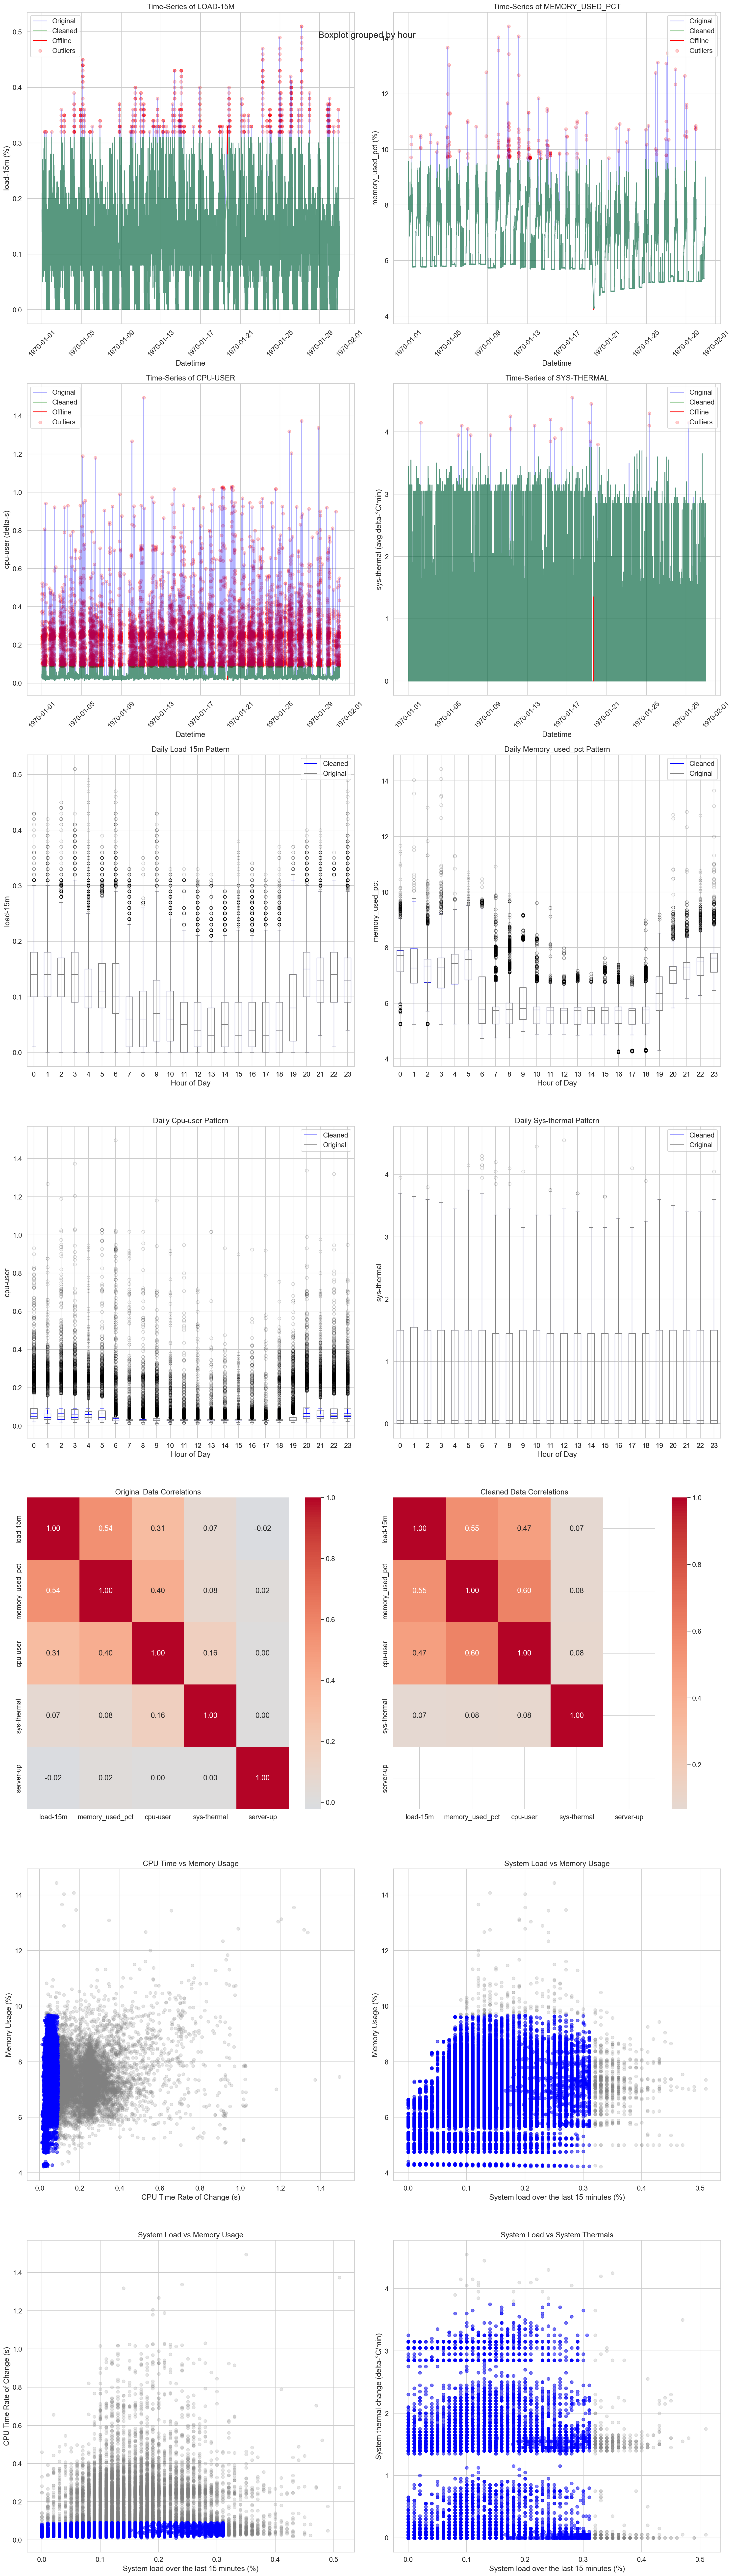

In [ ]:
def show_outliers_iqr(data: pd.Series, column: str) -> pd.Series:
    """Return outliers using IQR method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # debugging
    #print(column, " Q1: ", Q1- 1.5*IQR," Q3: ", Q3+ 1.5*IQR)
    valid_mask = (data[column] >= Q1 - 1.5*IQR) & \
                 (data[column] <= Q3 + 1.5*IQR)
    return data[column].where(~valid_mask)


def compare_data_versions(df_original: pd.DataFrame,
                         df_cleaned: pd.DataFrame) -> tuple:
    """Compare original and cleaned data versions.
    
    Parameters
    ----------
    df_original : pd.DataFrame
        Original unprocessed data
    df_cleaned : pd.DataFrame
        Cleaned and processed data
        
    Returns
    -------
    tuple
        (figures, comparison_stats) containing:
        - Comparison visualizations
        - Statistics dictionary
    """
    # YOUR CODE HERE
    # Follow Unit 2 example for data comparison
    # Create comparison visualizations
    # Calculate comparison statistics
    # Document data cleaning impact


    #df['hour'] = df.index.hour

    measurements = {
        'load-15m': ('load-15m', '%'),
        'memory_used_pct': ('memory_used_pct', '%'),
        'cpu-user': ('cpu-user', 'delta-s'),
        'sys-thermal': ('sys-thermal', 'avg delta-°C/min')
    }
    
    down_data = df_original[df_original['server-up'] != 2]

    df_outliers = df_original.copy()
    for col in measurements:
        df_outliers[col] = show_outliers_iqr(df_original, col)

    df_clean_hour = df_cleaned.copy()
    df_clean_hour['hour'] = df_cleaned.index.hour

    df_origin_hour = df_original.copy()
    df_origin_hour['hour'] = df_original.index.hour


    # Create comparison plots
    fig, axes = plt.subplots(7, 2, figsize=(20, 70))
    fig.suptitle('Original vs Cleaned Data Comparison', fontsize=28, y = 1.01)

    orig_out_pops = dict(marker='o', color='grey', markersize=6, linestyle='none', alpha=0.2)
    clean_out_prop = dict(marker='o', color='blue', markersize=6, linestyle='none', alpha=0.3)

    for i,(measure, (title, unit)) in enumerate(measurements.items()):
        row = i // 2
        col = i % 2
        
        # Plot original (gray) and cleaned (blue) data
        axes[row,col].plot(df_original.index, df_original[measure], color='blue', alpha=0.3, label='Original')
        axes[row,col].plot(df_cleaned.index, df_cleaned[measure], color='green', alpha=0.5, label='Cleaned')
        axes[row,col].plot(down_data.index,down_data[measure], color='red', label='Offline')
        axes[row, col].scatter(df_outliers.index, df_outliers[measure], color = 'red', alpha=0.2, label='Outliers')          
        # Add server status shading
        down_periods = df_original[df_original['server-up'] == 0].index
        for timestamp in down_periods:
            axes[row,col].axvspan(timestamp - pd.Timedelta('5m'),
                            timestamp + pd.Timedelta('5m'),
                            color='red', alpha=0.1)
        
        axes[row, col].set_title(f'Time-Series of {measure.upper()}')
        axes[row, col].set_xlabel('Datetime')
        axes[row, col].tick_params(axis='x', rotation=45)
        #axes[row, col].set_ylabel(measurement)
        axes[row, col].set_ylabel(f'{title} ({unit})')
        axes[row, col].grid(True)
        axes[row, col].legend()

        row = row + 2

        df_clean_hour.boxplot(
            ax=axes[row, col],
            column=measure,
            label = 'Cleaned',
            by='hour',
            color='blue',
            flierprops=clean_out_prop
        )
        df_origin_hour.boxplot(
            ax=axes[row, col],
            column=measure,
            label = 'Original',
            by='hour',
            color='grey',
            flierprops=orig_out_pops
        )
        axes[row, col].set_title(f'Daily {measure.capitalize()} Pattern')
        axes[row, col].set_xlabel('Hour of Day')
        axes[row, col].set_ylabel(measure)
        axes[row, col].grid(True)
        axes[row, col].legend()

    measure = measurements.keys()
    row = row + 1
    col = 0
    # Plot 4: Correlation Analysis
    # Original correlations

    corr_matrix_clean = df_cleaned[['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']].corr()
    corr_matrix_orig = df_original[['load-15m', 'memory_used_pct', 'cpu-user', 'sys-thermal', 'server-up']].corr()

    sns.heatmap(
        corr_matrix_orig,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt='.2f',
        ax=axes[row,col]
    )
    axes[row,col].set_title('Original Data Correlations')
    
    # Cleaned correlations
    sns.heatmap(
        corr_matrix_clean,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt='.2f',
        ax=axes[row,col+1]
    )
    axes[row,col+1].set_title('Cleaned Data Correlations')

    row = row + 1 
    # Scatter plots with server status
    axes[row, col].scatter(df_original['cpu-user'], df_original['memory_used_pct'],
                            color = 'gray',
                            alpha=0.2)
    axes[row, col].scatter(df_cleaned['cpu-user'], df_cleaned['memory_used_pct'],
                            color = 'b',
                            alpha=0.5)
    axes[row, col].set_xlabel('CPU Time Rate of Change (s)') 
    axes[row, col].set_ylabel('Memory Usage (%)') 
    axes[row, col].set_title('CPU Time vs Memory Usage')

    axes[row, col+1].scatter(df_original['load-15m'], df_original['memory_used_pct'],
                            color = 'gray',
                            alpha=0.2)
    axes[row, col+1].scatter(df_cleaned['load-15m'], df_cleaned['memory_used_pct'],
                            color = 'b',
                            alpha=0.5)
    axes[row, col+1].set_xlabel('System load over the last 15 minutes (%)') 
    axes[row, col+1].set_ylabel('Memory Usage (%)') 
    axes[row, col+1].set_title('System Load vs Memory Usage')

    row = row + 1 

    axes[row, col].scatter(df_original['load-15m'], df_original['cpu-user'],
                            color = 'gray',
                            alpha=0.2)   
    axes[row, col].scatter(df_cleaned['load-15m'], df_cleaned['cpu-user'],
                            color = 'b',
                            alpha=0.5)
    axes[row, col].set_xlabel('System load over the last 15 minutes (%)') 
    axes[row, col].set_ylabel('CPU Time Rate of Change (s)') 
    axes[row, col].set_title('System Load vs Memory Usage')
    
    axes[row, col+1].scatter(df_original['load-15m'], df_original['sys-thermal'],
                            color = 'gray',
                            alpha=0.2)  
    axes[row, col+1].scatter(df_cleaned['load-15m'], df_cleaned['sys-thermal'],
                            color = 'b',
                            alpha=0.5)      
    axes[row, col+1].set_xlabel('System load over the last 15 minutes (%)') 
    axes[row, col+1].set_ylabel('System thermal change (delta-°C/min)') 
    axes[row, col+1].set_title('System Load vs System Thermals')

    print("Document key statistics before/after")
    print("----Original data stats----")
    print(df_original.describe())
    print("----Cleaned data stats----")
    print(df_cleaned.describe())
    print("Explain preprocessing effects") 
    print("some datapoint-accumulations (clusters) and peaks are seen as outliers and removed, dublicate values = measurement errors are removed") 
    print("Justify data cleaning decisions")
    print("removing all values outside Q1/Q3 -/+ IQR reduces all values outside 99.3% of all values, leaving only the most relevant")

    stats = df_cleaned.describe() - df_original.describe()
    print('difference between clean and original')
    print(stats)
    return (fig, stats)


compare_data_versions(df_original, df_cleaned)

<!-- ## Task 2.3: Cleaned Data Analysis (24 points)

Based on your cleaned data visualizations from the previous task, analyze the system performance patterns. Your answers should reflect the improved data quality after preprocessing.

1. Server Availability Patterns:\
a_) Server uptime shows regular testing patterns\
b_) Maintenance windows (server-down periods) occur at consistent times

2. System Performance:\
c_) High load periods (load-15m) align with server uptime\
d_) High memory usage periods coincide with increased CPU time rate\
e_) Temperature change rate increases during high system load periods

3. System Health:\
f_) Server status shows regular planned downtime periods\
g_) System load shows no sustained periods near maximum values (>0.4)\
h_) System load frequently reaches peak values (>0.4) during test execution

4. Test Result Reliability:\
i_) Load average remains stable during test execution periods\
j_) Memory usage stays within normal operating range (no spikes) during tests\
k_) Server availability is consistent throughout test cycles -->



## Task 2.3: Cleaned Data Analysis (24 points)

Based on your visualizations, analyze the system performance patterns.

1. Test Execution Patterns:\
a_) System load shows clear day/night testing cycles

2. System Performance:\
b_) High load periods (load-15m) align with increased Memory usage\
c_) High memory usage periods coincide with increased CPU usage rate of change\
d_) Temperature change rate increases during high system load periods

3. Resource Utilization:\
e_) Memory usage consistently increases at test start and gradually decreases towards test completion\
f_) System load stays within reasonable limits (<0.4) during normal operation

4. System Behavior:\
g_) Memory usage returns to idle state levels (around 5-6%) between test cycles\
h_) Load, memory, and CPU metrics collectively show clear patterns distinguishing between test execution and idle periods\

In [ ]:
# Your answers and reasoning below. For each statement, first set the boolean value 
# then explain your reasoning based on the visualizations.

# Test Execution Patterns
a_ = True
# between 20.00 and 06.00 higher mem-usage and load on average

# System Performance
b_ = True
# Correlation map states: +55% correlation

c_ = True
# Correlation map states: +60% correlation

d_ = False
# Scatter shows pattern, but not corr. to load => confirmed by corr-map 
# which is counter-intuitive -> it is assumed, that since thermal-data is absolute value of temp-change (no sign "+/-") 
# ==> this statement could be "invalid" (not enough information/context -> e.g. sign of delta-T)

# Resource Utilization
e_ = False
# mem-use jumps at start and continously-increases (seen in time-series) -> then drops at end of test

f_ = True
# The cleaned data-set does not show any value outside ~0.3 
# -> original only includes few outliers >0.4 => NOT considered NORMAL operation 

# System Behavior
g_ = True
# Time-Series (and boxplot considering idle during daytime)

h_ = True 
# Time-series and Boxplots all coincide with this (higher values between 20.00-06.00)

In [ ]:
# Test cell - DO NOT MODIFY
for var in ['a_', 'b_', 'c_', 'd_', 'e_', 'f_', 'g_', 'h_']:
    assert var in locals(), f"Missing answer for {var}"
    assert isinstance(locals()[var], bool), f"Answer for {var} must be True or False"

## Extra Tasks: Interactive Visualizations (15 Bonus Points)

Leverage Altair to create interactive visualizations based on the cleaned system performance data. Before you start, review the **Interactive Plotting** tutorial to familiarize yourself with Altair's capabilities for crafting interactive plots.

Feel free to experiment and design different types of interactive visualizations that effectively represent the data, in addition to the tasks described below.

**Possible visualization ideas:**

- **Interactive Time-Series Charts**: Plot CPU and memory usage over time with zoom and pan functionalities.
- **Scatter Plots with Tooltips**: Explore relationships between performance metrics by displaying detailed information on hover.
- **Heatmaps and Correlation Matrices**: Visualize correlations with interactive elements that highlight specific data points.
- **Combined Dashboards**: Create a dashboard featuring multiple interactive charts for a holistic view of system performance.

Be creative and innovative in your approach to make the visualizations both informative and engaging.

### ET1: Basic Interactive Time Series (5 points)
Create an interactive time series visualization that includes:
1. System load over time with zoom/pan capabilities
2. Tooltips showing metric values
3. Server status indicated by color

Hint:
```python

import altair as alt

# Enable the rendering of charts
alt.renderers.enable('default')
# Set a maximum number of rows for Altair
alt.data_transformers.enable('default', max_rows=None)

def create_basic_interactive(df):
    # Base chart with zoom
    chart = alt.Chart(df.reset_index()).mark_line().encode(
        x='datetime:T',
        y=alt.Y('cpu-user', 
                title='CPU Time Rate of Change (seconds)'),  # Updated title
        color=alt.Color('server-up:Q', 
                       scale=alt.Scale(scheme='redyellowgreen')),
        tooltip=['datetime:T', 
                alt.Tooltip('cpu-user', 
                           title='CPU Time Change'), 
                'server-up']
    ).interactive()
    
    return chart
```

Note: Make sure to install required packages:
```python
# Install packages if needed:
# pip install altair altair_saver vega_datasets
# or
# conda install -c conda-forge altair altair_saver vega_datasets

# altair_saver package - to allow saving visualizations.
# vega_datasets - to provide example datasets
# Note: Above two packages (altair_saver and vega_datasets) are not necessary here but relevant for the interactive tutorial.
```

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 



### ET2: Linked Views (5 points)
Create two linked interactive visualizations:
1. Load vs Memory usage scatter plot
2. Corresponding histogram of selected data points
3. Implement brushing to highlight points

Hint:
```python
def create_linked_views(df):
    # Create selection
    brush = alt.selection_interval()
    
    # Scatter plot
    scatter = alt.Chart(df).mark_point().encode(
        x='load-15m',
        y='memory_used_pct',
        color=alt.condition(brush, 'server-up:Q', alt.value('lightgray'))
    ).add_selection(brush)
    
    # Histogram for selected data
    hist = alt.Chart(df).mark_bar().encode(
        x='load-15m',
        y='count()'
    ).transform_filter(brush)
    
    return scatter & hist  # Stack vertically
```




In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### ET3: Advanced Dashboard (5 points)
Create a comprehensive dashboard with:
1. Time series with selectable time range
2. Metric comparison scatter plot
3. Summary statistics for selected period
4. Interactive filtering across all views

Points awarded for:
- Creative use of Altair features
- Effective interaction design
- Clear visual communication


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()